## <b>Understanding Feedforward Neural Network</b>

In this lab, you are required to build 3 Feedforward Neural Networks to simulate function
<br> $y = xsin( \frac {x^2} {300})$
<br> in range x: +-100
<br> You need to have a different structure for each model you build.

##Requirements

1 You are required to finish each part below following instructions.
<br>2 You may work on native py files, but your work needs to include same documentation. You may use pytorch or tensorflow keras.
<br>3 You may work in a group of 2.

<br><b>For submission, submit a link to your github repo</b>
<br>All student in the group must submit.

#### Part 1 data preparation

In the cell below, generate training data for your model.
<br> Generate a decent amount of training data in the interval of x.
<br>
<br> Since we are only approximating a function, data can be generated by plug in x value and get corresponding y value.
<br>You may use the way to generate data as in file Introduction_to_Artificial_Neural_Network.ipynb ([np.linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html))
<br>
<br>All data need to be separated by the same distance.
<br>Ex:if you select an intervel from -100 to +100, and a total of 10001 data points, each x coordinate should be separated by 0.02


In [4]:
import numpy as np
import matplotlib.pyplot as plt

x_min, x_max = -100, 100
num_points = 500
delta_x = (x_max - x_min) / (num_points - 1)

# Generate x values
x_vals = np.linspace(x_min, x_max, num_points)

# Calculate corresponding y values
y_vals = x_vals * np.sin(x_vals**2 / 300)




#### Part 2 build models

In the cells below, build your models and train it with data from part1.
<br>
<br> You may use the model built in file Introduction_to_Artificial_Neural_Network.ipynb and change number of layers, number of neurons in each layer, activation function, loss function (loss), batch size, and/or epochs of the model. Or you can build your own model from scratch.
<br>
<br>Observe the change in training process (training time, accuracy changing rate) and final results when you change the parameters.
<br>
<br>You need to split your training data to two parts. With 40% used in training, and 60% used in test. You may do this with sklearn's [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) or keras' [validation_split](https://keras.io/api/models/model_training_apis/#fit-method) parameter in fit method together with train_test_split().

In [6]:
# model 1
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, Activation, Flatten
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x_vals, y_vals, test_size=.6, random_state= 40)


model1 = Sequential()
model1.add(Input(shape=(1,)))
model1.add(Dense(150,activation = "relu"))
model1.add(Dense(150,activation = "LeakyReLU"))
model1.add(Dense(150,activation = "ThresholdedReLU"))
model1.add(Dense(150,activation = "PReLU"))
model1.add(Dense(150,activation = "ELU"))
model1.add(Dense(150,activation = "relu"))
model1.add(Dense(1))

model1.compile(
   loss = 'MAE', optimizer = 'Adam', metrics=['mae']
)
model1.fit(X_train, Y_train, batch_size = 128, epochs = 50)

#part 3
model1.evaluate(X_train,Y_train)



Epoch 1/50
2/2 [==============================] - 1s 12ms/step - loss: 31.2610 - mae: 31.2610
Epoch 2/50
2/2 [==============================] - 0s 21ms/step - loss: 31.0953 - mae: 31.0953
Epoch 3/50
2/2 [==============================] - 0s 12ms/step - loss: 31.0497 - mae: 31.0497
Epoch 4/50
2/2 [==============================] - 0s 12ms/step - loss: 31.0636 - mae: 31.0636
Epoch 5/50
2/2 [==============================] - 0s 11ms/step - loss: 31.0686 - mae: 31.0686
Epoch 6/50
2/2 [==============================] - 0s 21ms/step - loss: 31.0707 - mae: 31.0707
Epoch 7/50
2/2 [==============================] - 0s 19ms/step - loss: 30.8897 - mae: 30.8897
Epoch 8/50
2/2 [==============================] - 0s 11ms/step - loss: 30.8507 - mae: 30.8507
Epoch 9/50
2/2 [==============================] - 0s 13ms/step - loss: 30.9212 - mae: 30.9212
Epoch 10/50
2/2 [==============================] - 0s 11ms/step - loss: 30.8392 - mae: 30.8392
Epoch 11/50
2/2 [==============================] - 0s 12ms/

[29.846031188964844, 29.846031188964844]

Epoch 1/75
2/2 [==============================] - 1s 11ms/step - loss: 31.2909 - mae: 31.2909
Epoch 2/75
2/2 [==============================] - 0s 9ms/step - loss: 31.0310 - mae: 31.0310
Epoch 3/75
2/2 [==============================] - 0s 10ms/step - loss: 31.0199 - mae: 31.0199
Epoch 4/75
2/2 [==============================] - 0s 10ms/step - loss: 31.1445 - mae: 31.1445
Epoch 5/75
2/2 [==============================] - 0s 10ms/step - loss: 31.7033 - mae: 31.7033
Epoch 6/75
2/2 [==============================] - 0s 10ms/step - loss: 32.2993 - mae: 32.2993
Epoch 7/75
2/2 [==============================] - 0s 10ms/step - loss: 31.8686 - mae: 31.8686
Epoch 8/75
2/2 [==============================] - 0s 10ms/step - loss: 31.2897 - mae: 31.2897
Epoch 9/75
2/2 [==============================] - 0s 9ms/step - loss: 31.0466 - mae: 31.0466
Epoch 10/75
2/2 [==============================] - 0s 10ms/step - loss: 30.9516 - mae: 30.9516
Epoch 11/75
2/2 [==============================] - 0s 10ms/st

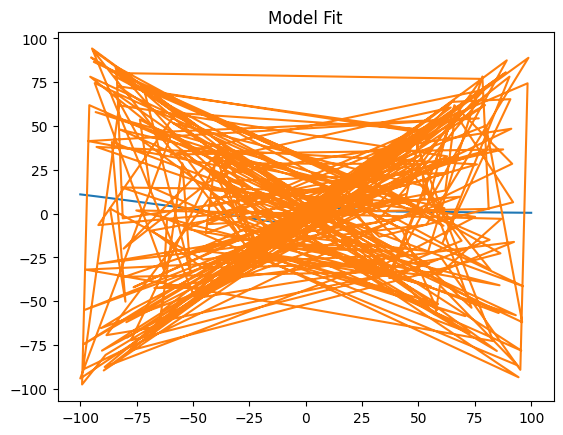

In [13]:
# model 2
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, Activation, Flatten
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x_vals, y_vals, test_size=.6, random_state= 40)


model2 = Sequential()
model2.add(Input(shape=(1,)))
model2.add(Dense(150,activation = "relu"))
model2.add(Dense(150,activation = "LeakyReLU"))
model2.add(Dense(150,activation = "ThresholdedReLU"))
model2.add(Dense(150,activation = "PReLU"))
model2.add(Dense(150,activation = "ELU"))
model2.add(Dense(150,activation = "relu"))
model2.add(Dense(1))

model2.compile(
   loss = 'MAE', optimizer = 'Adam', metrics=['mae']
)
model2.fit(X_train, Y_train, batch_size = 192, epochs = 75)


#part3
model2.evaluate(X_train,Y_train)


In [9]:
# model 3
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, Activation, Flatten
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x_vals, y_vals, test_size=.6, random_state= 40)


model3 = Sequential()
model3.add(Input(shape=(1,)))
model3.add(Dense(150,activation = "relu"))
model3.add(Dense(150,activation = "LeakyReLU"))
model3.add(Dense(150,activation = "ThresholdedReLU"))
model3.add(Dense(150,activation = "PReLU"))
model3.add(Dense(150,activation = "ELU"))
model3.add(Dense(150,activation = "relu"))
model3.add(Dense(1))

model3.compile(
   loss = 'MAE', optimizer = 'Adam', metrics=['mae']
)
model3.fit(X_train, Y_train, batch_size = 256, epochs = 100)


#part 3
model3.evaluate(X_train,Y_train)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 31.2214 - mae: 31.2214
Epoch 2/100
1/1 [==============================] - 0s 33ms/step - loss: 31.0851 - mae: 31.0851
Epoch 3/100
1/1 [==============================] - 0s 39ms/step - loss: 31.0448 - mae: 31.0448
Epoch 4/100
1/1 [==============================] - 0s 31ms/step - loss: 31.0025 - mae: 31.0025
Epoch 5/100
1/1 [==============================] - 0s 33ms/step - loss: 30.9693 - mae: 30.9693
Epoch 6/100
1/1 [==============================] - 0s 29ms/step - loss: 30.9161 - mae: 30.9161
Epoch 7/100
1/1 [==============================] - 0s 27ms/step - loss: 30.8843 - mae: 30.8843
Epoch 8/100
1/1 [==============================] - 0s 22ms/step - loss: 30.8648 - mae: 30.8648
Epoch 9/100
1/1 [==============================] - 0s 21ms/step - loss: 30.8609 - mae: 30.8609
Epoch 10/100
1/1 [==============================] - 0s 22ms/step - loss: 30.8525 - mae: 30.8525
Epoch 11/100
1/1 [==============================] -

[29.017723083496094, 29.017723083496094]

#### Part 3 model evaluation

In the cells below, eval your model with training data, test data ( with [model.evaluate()](https://keras.io/api/models/model_training_apis/#evaluate-method) ), and plot your predict result on the same plot with the plot of goal function.

16/16 [==============================] - 0s 2ms/step


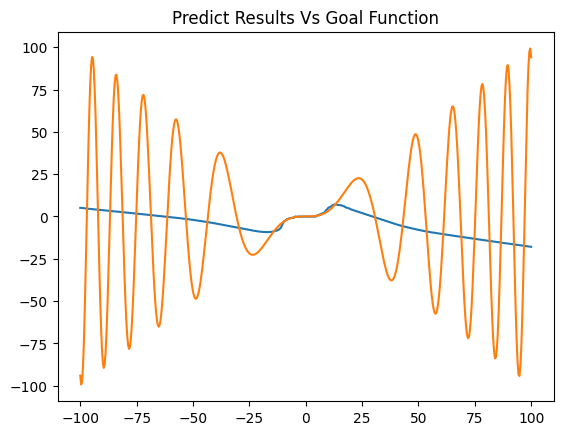

16/16 [==============================] - 0s 2ms/step


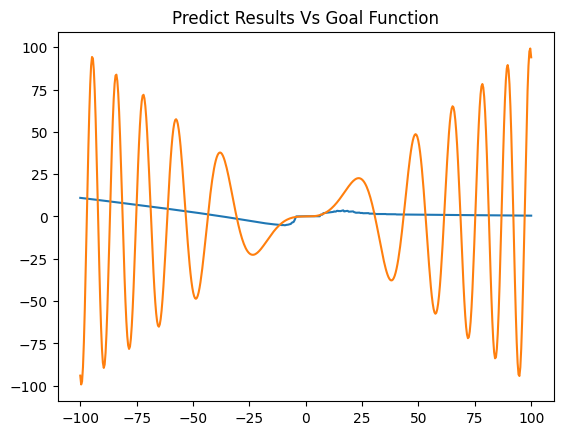

16/16 [==============================] - 0s 2ms/step


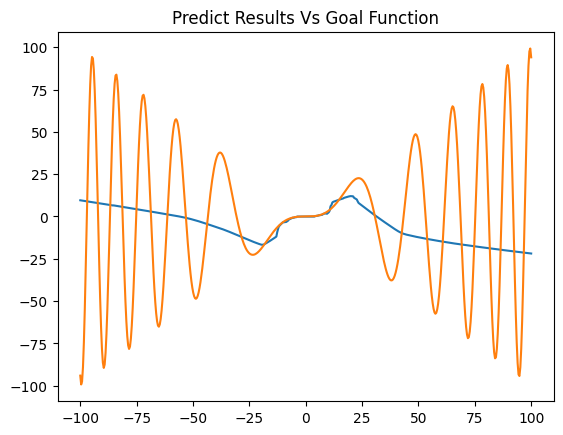

In [14]:

#Part 3 is done in the cells of each different model.
p_values= model1.predict(x_vals)
plt.plot(x_vals, p_values)
plt.plot(x_vals, y_vals)
plt.title("Predict Results Vs Goal Function")
plt.show()

p_values= model2.predict(x_vals)
plt.plot(x_vals, p_values)
plt.plot(x_vals, y_vals)
plt.title("Predict Results Vs Goal Function")
plt.show()

p_values= model3.predict(x_vals)
plt.plot(x_vals, p_values)
plt.plot(x_vals, y_vals)
plt.title("Predict Results Vs Goal Function")
plt.show()

#### Part 4 get model output and feedforward by yourself

Recall how a Feedforward Neural Network gets its output. Now choose your model with highest accuracy, and call [get_weights()](https://keras.io/api/layers/base_layer/#get_weights-method) to get its weights and bias.
<br>
<br> Hint: bias and weights have different dimensions in most cases. Try to guess which index represent bias before you look it up on the internet.

<br> Afterwards, choose 5 data from your training dataset, do all the necessary calculations (with program of course), and get the output of your model. Compare it to the [model.predict()](https://keras.io/api/models/model_training_apis/#predict-method) result.
<br> They should be identical for the first several digitals, if not for all digits.
<br>
<br> If you do not know what are the necessary calculations, they are the steps mentioned in file Introduction_to_Artificial_Neural_Network.ipynb
<br> Matrix transpose can be done easily with [pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transpose.html) or [numpy](https://numpy.org/doc/stable/reference/generated/numpy.matrix.transpose.html). Activation functions can be applied with [keras' activation functions](https://keras.io/api/layers/activations/#available-activations).
